For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

In [138]:
#simulate the problem
cars = np.random.poisson(2, size = 10_000)

array([2, 1, 3, ..., 3, 1, 2])

In [2]:
λ = 2
cars_in_hour = stats.poisson(λ)

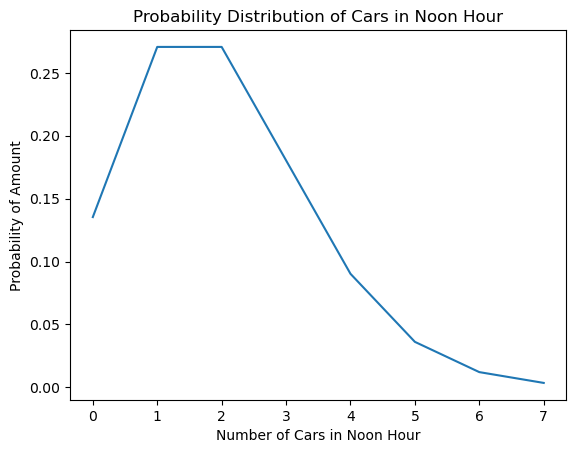

In [6]:
x = np.arange(0,8)
y = [cars_in_hour.pmf(i) for i in x]
plt.plot(x, y)
plt.xlabel('Number of Cars in Noon Hour')
plt.ylabel('Probability of Amount')
plt.title('Probability Distribution of Cars in Noon Hour')
plt.show()

In [143]:
(cars == 0).mean()

0.1291

In [145]:
#What is the probability that no cars drive up in the noon hour?
print(f'simulated chance there are no cars in an hour\
 is: {(cars == 0).mean()}')
print(f'calculated chance there are no cars in an hour\
 is: {cars_in_hour.pmf(0)}') #inclusive of endpoint

simulated chance there are no cars in an hour is: 0.1291
calculated chance there are no cars in an hour is: 0.1353352832366127


In [146]:
#What is the probability that 3 or more cars come through the drive through?
print(f'simulated chance there are 3 or more in an hour\
 is: {(cars >= 3).mean()}')
print(f'calculated chance there are 3 or more cars in an hour\
 is: {cars_in_hour.sf(2)}') #exclusive of endpoint

simulated chance there are 3 or more in an hour is: 0.3253
calculated chance there are 3 or more cars in an hour is: 0.32332358381693654


In [147]:
#How likely is it that the drive through gets at least 1 car?
print(f'simulated chance there is at least 1 car in an hour\
 is: {(cars >= 1).mean()}')
print(f'calculated chance there is at least 1 car in an hour\
 is: {cars_in_hour.sf(0)}') #exclusive of endpoint

simulated chance there is at least 1 car in an hour is: 0.8709
calculated chance there is at least 1 car in an hour is: 0.8646647167633873


2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

In [18]:
μ = 3.0
σ = 0.3
gpa = stats.norm(μ, σ)

In [19]:
#What grade point average is required to be in the top 5% of the graduating class?
gpa.isf(0.05) #inclusive

3.4934560880854417

In [20]:
#What GPA constitutes the bottom 15% of the class?
gpa.ppf(0.15)

2.689069983151863

In [21]:
#An eccentric alumnus left scholarship money for students in the third decile (bottom 30%)
# from the bottom of their class. Determine the range of the third decile. 

gpa.ppf(0.3)

2.842679846187588

Would a student with a 2.8 grade point average qualify for this scholarship?
- Yes, 2.8 < 2.8426 so it would be within the bottom 30%, third decile

If I have a GPA of 3.5, what percentile am I in?
- No, 3.5 > 2.8426 so it wouldn't be in the bottom 30%

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [22]:
# binomial distribution
click_thru = stats.binom(4326, 0.02)

In [27]:
#How likely is it that this many people (97) or more click through?
# prob of value or above is survival function
click_thru.sf(96) #endpoint exclusive

0.13975823631416445

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
- What is the probability that at least one of your first 60 answers is correct?

In [24]:
# binomial distribution
# 100 trials (questions)
# 1/100 (0.01) chance to get question right
n = 100
p = 0.01
homework = stats.binom(n, p)

In [26]:
# What is the probability that at least one of your first 60 answers is correct?
n = 60
p = 0.01
first_sixty = stats.binom(n, p)
#prob of given value or above is sf
first_sixty.sf(0) #endpoint exclusive

0.45284335760923855

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
- How likely is it that the break area gets cleaned up each day? 
- How likely is it that it goes two days without getting cleaned up? 
- All week?

In [46]:
# number of students per day is binomial with 66 trials, @ 90% success rate
students_per_day = stats.binom(66, .9).rvs(5)
students_per_day

array([55, 58, 64, 61, 59])

In [69]:
# How likely is it that the break area gets cleaned up each day?
# chance of success for each student is 0.03
p = 0.03
clean_each_day = [stats.binom(day, p).pmf(0) for day in students_per_day]
print(f'chance that the break area gets cleaned each day in a week \
is: {np.prod(clean_each_day)}')

chance that the break area gets cleaned each day in a week is: 0.00012146001846448505


In [66]:
# How likely is it that it goes two days without getting cleaned up?
students_per_day = stats.binom(66, .9).rvs(2)
p = 0.03
not_clean_2_days = [1 - stats.binom(day, p).pmf(0) for day in students_per_day]
print(f'chance that the break area does not get cleaned for 2 days \
is: {np.prod(not_clean_2_days)}')

chance that the break area does not get cleaned for 2 days is: 0.6957690731191805


In [67]:
# How likely is it that it goes all week without getting cleaned up?
students_per_day = stats.binom(66, .9).rvs(5)
p = 0.03
not_clean_5_days = [1 - stats.binom(day, p).pmf(0) for day in students_per_day]
print(f'chance that the break area does not get cleaned all week \
is: {np.prod(not_clean_5_days)}')

chance that the break area does not get cleaned all week is: 0.40457250631195996


6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [90]:
# amount of people in line is mean 15 stddev 3
# multiply each person in line by 2 minutes
# 60 minutes to start with, minus 10 to get food
# find chance that have >= 15 minutes to eat
time = 60 - 10 - 15
max_people = (time / 2) - 1.5 #minus 1 for our own order, and minus .5 since no half people
#chance that there are less than max people in line = cdf
people_in_line = stats.norm(15,3).cdf(max_people)
print(f'chance that you can get food in time is: {people_in_line}')

chance that you can get food in time is: 0.6305586598182363


7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.
- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?

In [91]:
import env

In [92]:
connection = env.get_db_url('employees')

In [95]:
query = '''
SELECT 
    AVG(salary)
FROM salaries
WHERE to_date > now();
'''
avg_salary = pd.read_sql(query, connection)

In [96]:
query = '''
SELECT 
    STDDEV(salary)
FROM salaries
WHERE to_date > now();
'''
stddev_salary = pd.read_sql(query, connection)

In [108]:
query = '''
SELECT 
    *
FROM salaries
WHERE to_date > now();
'''
df = pd.read_sql(query, connection)

In [106]:
avg_salary = avg_salary.iloc[0][0]
stddev_salary = stddev_salary.iloc[0][0]

In [118]:
# What percent of employees earn less than 60,000?
less_than_60k = stats.norm(avg_salary, stddev_salary).cdf(60_000)
print(f'calculated percent of employees making less than 60,000 is: {less_than_60k}')

actual_less_than_60k = len(df[df.salary < 60_000]) / len(df)
print(f'actual percent of employees making less than 60,000 is: {actual_less_than_60k}')

calculated percent of employees making less than 60,000 is: 0.2438569709201618
actual percent of employees making less than 60,000 is: 0.2705727041028802


In [120]:
#What percent of employees earn more than 95,000?
more_than_95k = stats.norm(avg_salary, stddev_salary).sf(95_000)
print(f'calculated percent of employees making more than 95,000 is: {more_than_95k}')

actual_more_than_95k = len(df[df.salary > 95_000]) / len(df)
print(f'actual percent of employees making more than 95,000 is: {actual_more_than_95k}')

calculated percent of employees making more than 95,000 is: 0.09208773564924777
actual percent of employees making more than 95,000 is: 0.1086272092752078


In [122]:
# What percent of employees earn between 65,000 and 80,000?
between_65_80k = (stats.norm(avg_salary, stddev_salary).cdf(80_000) 
                  - stats.norm(avg_salary, stddev_salary).cdf(65_000)) 
print(f'calculated percent of employees making between 65,000 \
and 80,000 is: {between_65_80k}')

actual_between_65_80k = len(df[(65_000 < df.salary) & (df.salary < 80_000)]) / len(df)
print(f'actual percent of employees making between 65,000 \
and 80,000 is: {actual_between_65_80k}')

calculated percent of employees making between 65,000 and 80,000 is: 0.3350612231883823
actual percent of employees making between 65,000 and 80,000 is: 0.325107028035515


In [132]:
# len(df.salary.sort_values(ascending=False)) * .05
#12006 entries in top 5 percent
df.salary.sort_values(ascending=False)[:12006].min()

104228

In [133]:
# What do the top 5% of employees make?
top_5 = stats.norm(avg_salary, stddev_salary).isf(.05)
print(f'calculated salary to be in the top 5% is: {top_5}')

actual_top_5 = df.salary.sort_values(ascending=False)[:12006].min()
print(f'actual salary to be in top 5% is: {actual_top_5}')

calculated salary to be in the top 5% is: 100484.58529677246
actual salary to be in top 5% is: 104228
